# Data Wrangling and Cleaning

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from datetime import date, timedelta
%matplotlib inline
import os


In [2]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests', path='headlines', unzip=True)

First load packages and download the headline file from Kaggle.

https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests

In [3]:
# read the VIX prices
## https://www.cboe.com/tradable_products/vix/vix_historical_data/
df = pd.read_csv(r"C:\Users\micha\Documents\Springboard\Capstone-3\Data\VIX_History.csv")
# read the kaggle dataset ------- put link and citations
## https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests?select=raw_partner_headlines.csv
df_hdl = pd.read_csv(r"C:\Users\micha\Documents\Springboard\Capstone-3\Notebooks\headlines\analyst_ratings_processed.csv")

Read the headlines and VIX prices into CSV files `df` for the prices and `df_hdl` for the headlines.

Take a quick peak at the headlines.

In [4]:
df_hdl.shape

(1400469, 4)

In [5]:
print(f'There are {df_hdl.shape[0]} headlines')

There are 1400469 headlines


In [6]:
df_hdl.isnull().sum()

Unnamed: 0    1289
title            0
date          1289
stock         2578
dtype: int64

In [7]:
print(f'The number of missing rows is very small at {df_hdl.stock.isnull().sum()/df_hdl.shape[0]*100:1.2f}%')

The number of missing rows is very small at 0.18%


In [8]:
## set both date columns to datetime
df_hdl['date'] = pd.to_datetime(df_hdl['date'],utc=True, errors='coerce')
df['DATE'] = pd.to_datetime(df['DATE'], utc=True)


Make some categories for the stock headlines

In [9]:
vix_funds = ['VXZ', 'VIXM', 'SVOL', 'VXX', 'VIXY', 'UVXY']
market = ['SPX']
top_30 = ["AAPL", "MSFT", "AMZN", "NVDA", "TSLA", "FB", "GOOGL", "GOOG", "JPM", "JNJ", "V", "PG", "UNH", "MA", "HD", "DIS", "BAC", "PYPL", "VZ", "KO"]

In [10]:
energy = ["XOM", "CVX", "SHEL", "PCCYF", "TTE", "COP", "BP", "EQNR", "PBR.A", "PBR", "SNPMF", "SLB", "CUAEF", "CSUAY", "EOG", "CNQ", "ENB", "EPD", "MPC", "PXD", "OXY", "EIPAF", "E", "HES", "PSX", "VLO", "SU", "ET", "WOPEF", "WDS"]

In [11]:
utilities = ["NEE", "SO", "DUK", "NGG", "SRE", "AEP", "EXC", "D", "XEL", "ES", "PPL", "EIX", "ED", "WEC", "AWK", "CNP", "FE", "OGE", "ATO", "LNT"]

In [12]:
it_sector = ["AAPL", "MSFT", "AMZN", "NVDA", "GOOGL", "FB", "TSLA", "ADBE", "CRM", "CSCO", "INTC", "ORCL", "IBM", "QCOM", "ACN", "TXN", "AVGO", "NOW", "SHOP", "AMD",
"ADP","ATVI","ADSK","ANSS","APH","CDNS","CDW","CTSH","GLW","DXC","FFIV","FISV","FLT","FTNT","HPE","HPQ","INTU","ITW","JKHY","KEYS",
"KLAC","LRCX","LDOS","MA","MCHP","MU","MSI","NTAP","NLOK","NXPI","PAYC","PYPL","QRVO","SNPS","SWKS","TEL","TER","TRMB","TYL",
"VRSN"]
health_care = ["ABT", "ABBV", "ABMD", "A", "ALXN", "ALGN", "AMGN", "ANTM", "BAX", "BDX", "BIIB", "BSX", "BMY", "CAH", "CERN", "CI", "CNC", "CVS", "DHR", "DVA", "DXCM", "EW", "GILD", "HCA", "HSIC", "HOLX", "HUM", "IDXX", "ILMN", "INCY", "ISRG", "IQV",
"JNJ","LH","LLY","LHCG","LUMN","MCK","MDT","MRNA","MRK","MTD","MYL","NEO","NKTR","PKI","PRGO","PFE","DGX","REGN","RMD","STE","SYK","TFX","TMO","UNH","UHS","VAR","VRTX","WAT","WCG","WST","ZBH","ZTS"]
industrials = ["MMM", "AAL", "ALK", "ALLE", "AOS", "BA", "CHRW", "CARR", "CAT", "CTAS", "CSX", "DAL", "DE", "DOV", "ETN", "EFX", "EMR", "EXPD", "FAST", "FDX", "FLS", "FTV", "GD", "GE", "GWW", "HII", "HON", "HWM", "INFO", "IR", "JBHT", "JCI", "KSU", "LHX", "LMT", "MAS", "MPC", "MSI", "NOC", "NSC", "ODFL", "OTIS", "PCAR", "PHM",
"PWR","RHI","ROK","ROP","RTX","SNA","SWK","TDY","TT","TXT","UAL","UNP","URI","VRSK","WM","XYL"]

real_estate = ["ARE", "AMT", "AVB", "BXP", "CBRE", "CCI", "DLR", "DRE", "EQR", "ESS", "EXR", "FRT", "HST", "IRM", "KIM", "NNN", "O", "PLD", "PSA", "REG", "SPG", "SLG", "UDR", "VNO", "WELL", "BPYPP", "CRESY", "CSGP", "EXPI", "FLJH", "FRPH", "FTHM", "MDJH", "NMRK", "OPEN", "RDFN", "RMR", "VINO", "CIGI", "FSV","LUXH","REAX","SFR"]

In [13]:
inverse_vix = ['SVXY']
len(df_hdl[df_hdl['stock'].isin(inverse_vix)])

24

In [14]:
len(df_hdl[df_hdl['stock'].isin(vix_funds)])

618

In [15]:
len(df_hdl[df_hdl['stock'].isin(energy)])

11859

In [16]:
# df_hdl['stock'].unique()[5100:5900]

In [17]:
df_hdl.isnull().sum()

Unnamed: 0    1289
title            0
date          2578
stock         2578
dtype: int64

Let's look at some of the missing values.

In [18]:
df_hdl[df_hdl['date'].isnull()].sample(20)

,Unnamed: 0,title,date,stock
287512,291962.0,Duncan Williams Reiterates Hold on Computer Pr...,NaT,NaN
449899,455509.0,Italian Cabinet Approves Bill on Anti-Crisis M...,NaT,NaN
944484,NaN,2011-07-19 07:34:00-04:00,NaT,NaN
147695,151714.0,Piper Jaffray Reiterates Neutral and PT of $22...,NaT,NaN
269272,273669.0,Con-Way Board Declares Quarterly Dividend on C...,NaT,NaN
45661,49247.0,Arlington Asset Investment Corp. Announces Com...,NaT,NaN
480540,NaN,2011-07-26 06:35:00-04:00,NaT,NaN
940047,952067.0,ONEOK Partners to Invest $340 Million to $360 ...,NaT,NaN
223426,227664.0,Negative Article on Education Names,NaT,NaN
650711,NaN,2011-07-29 02:48:00-04:00,NaT,NaN


In [19]:
#df_hdl.drop('Unnamed: 0', axis=1, inplace=True)
df_hdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1399180 non-null  float64            
 1   title       1400469 non-null  object             
 2   date        1397891 non-null  datetime64[ns, UTC]
 3   stock       1397891 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 42.7+ MB


## Text of Headlines 
### Data
Now look at the headlines

In [20]:
df_hdl['date'] = df_hdl['date'].dt.date

In [21]:
df_hdl.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03,A
2,2.0,71 Biggest Movers From Friday,2020-05-26,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22,A


In [22]:
df_hdl.isnull().sum()

Unnamed: 0    1289
title            0
date          2578
stock         2578
dtype: int64

In [23]:
## the null values are all in the same places so drop them
len(df_hdl[df_hdl['date'].isnull() & df_hdl['stock'].isnull()])


2578

In [24]:
df_hdl.dropna(how='any',axis=0, inplace=True)
df_hdl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397891 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1397891 non-null  float64
 1   title       1397891 non-null  object 
 2   date        1397891 non-null  object 
 3   stock       1397891 non-null  object 
dtypes: float64(1), object(3)
memory usage: 53.3+ MB


In [25]:
## Add VADER sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def vader_compound(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [26]:
%%time
#Apply Compound score
df_hdl['compound'] = df_hdl['title'].apply(vader_compound)

CPU times: total: 55.5 s
Wall time: 1min 26s


In [27]:
##  Positive Negative Neutral Classification of each
def sentiment(compound):
  if compound >= 0.05:
    return 'Positive'
  elif compound <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

In [28]:
%%time
df_hdl['sentiment'] = df_hdl['compound'].apply(lambda x: sentiment(x))

CPU times: total: 234 ms
Wall time: 339 ms


In [29]:
print(f"There are {len(df_hdl['date'].unique())} dates starting at {df_hdl['date'].min()} and ending at {df_hdl['date'].max()} ")

There are 3959 dates starting at 2009-02-14 and ending at 2020-06-11 


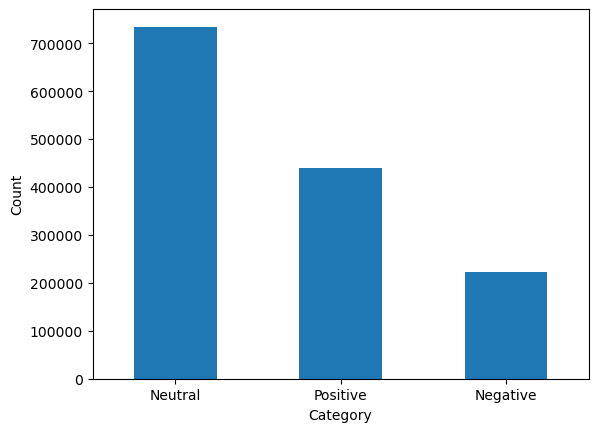

sentiment
Neutral     0.525453
Positive    0.314826
Negative    0.159721
Name: count, dtype: float64


In [30]:
counts = df_hdl['sentiment'].value_counts()

# plot the bar chart
counts.plot(kind='bar', xlabel='Category', ylabel='Count', rot=0)
plt.show()
print(counts/len(df_hdl))

Just over half the headlines are Neutral and the other half are roughly 2 to 1 in favor of Positive.

In [31]:
%%time
#Aggregate retweet count and fav_count by date, concat tweet and tweetType 
number = df_hdl.groupby('date').sum().reset_index()
headlines = df_hdl.groupby('date')['title'].apply(lambda x: ', '.join(x)).reset_index()
sentiments = df_hdl.groupby('date')['sentiment'].apply(lambda x: ', '.join(x)).reset_index()
stocks = df_hdl.groupby('date')['stock'].apply(lambda x: ', '.join(x)).reset_index()

CPU times: total: 6.38 s
Wall time: 12.1 s


In [32]:
# this dataframe aggregates by date and sums/concatenates everything 
## the relevant sum is compound which is the sum of the vader scores for the day's headlines
number.sample(5)

,date,Unnamed: 0,title,stock,compound,sentiment
1110,2012-08-01,493242661.0,UPDATE: Deutsche Bank Increases PT on Advisory...,ABCOABCOABCOACHACRXACTGADMADMADPADPAEGNAEGNAEO...,3.9101,NeutralNegativeNeutralPositiveNeutralNeutralNe...
70,2009-09-10,49213182.0,Monsanto (MON) Offers Disappointing Guidance f...,AAAAAEMAMBBBIGBXCICPEDDDALDDSDKSDVAXEECAEGBNEP...,6.6787,NegativePositiveNegativePositiveNeutralNeutral...
214,2010-02-14,11544389.0,AutoNation (AN) CEO Says Toyota's (TM) Loss Is...,ANBHPCECODBCEFAERICFCXGISHMCNEMRDSSOTMTMTMXLU,1.4311,PositiveNeutralPositiveNeutralNeutralNeutralNe...
3743,2019-11-09,19172392.0,Notable Insider Buys In The Past Week: McDonal...,AGOATSGATVIAZNBABABACCDHREDEEMFGILDILMNJNJLSCC...,0.8982,NeutralNeutralNeutralNeutralNeutralNeutralNeut...
1029,2012-05-12,3158788.0,"Oppenheimer Reiterates Outperform Rating, $84 ...",BBBYBITAIPARLSTRXPO,0.0000,NeutralNeutralNeutralNeutralNeutral


In [33]:
## the text dataframe contains the titles for each date separated by commas 
## may need to clean all the commas out of the individual headlines first
headlines.sample(5)

,date,title
549,2011-01-15,Not just GARP -- new Growth Stock screen captu...
145,2009-12-02,Anchor Bancorp (ABCW) Gets Help From Badger Ho...
1994,2015-01-06,BofA Earlier Downgraded Asbury Auto from Buy t...
641,2011-04-17,Investors Go HAM for Commodity Trader Glencore...
518,2010-12-15,J.P. Morgan Upgrades Agilent Tech To OW; PT Go...


In [34]:
## the sentiments dataframe contains the sentiments for each date separated by commas
sentiments.sample(5)

,date,sentiment
2860,2017-05-30,"Neutral, Neutral, Neutral, Neutral, Neutral, P..."
478,2010-11-05,"Neutral, Neutral, Positive, Negative, Positive..."
364,2010-07-14,"Neutral, Neutral, Positive, Positive, Neutral,..."
3254,2018-07-06,"Neutral, Neutral, Neutral, Positive, Neutral, ..."
3909,2020-04-23,"Positive, Neutral, Neutral, Positive, Neutral,..."


In [35]:
#Merge the dataframes together 
df3 = pd.merge(sentiments, headlines, how='outer', on='date')
df3 = pd.merge(df3, stocks, how='outer', on='date')
df3 = pd.merge(df3, number, how = 'outer', on = 'date')
df3.head()

,date,sentiment_x,title_x,stock_x,Unnamed: 0,title_y,stock_y,compound,sentiment_y
0,2009-02-14,Positive,How Treasuries and ETFs Work,NAV,883755.0,How Treasuries and ETFs Work,NAV,0.2263,Positive
1,2009-04-27,"Neutral, Neutral","Update on the Luxury Sector: 2nd Quarter 2009,...","FT, Y",1919075.0,Update on the Luxury Sector: 2nd Quarter 2009U...,FTY,0.0000,NeutralNeutral
2,2009-04-29,Neutral,Going Against the Herd,A,1834.0,Going Against the Herd,A,0.0000,Neutral
3,2009-05-22,Neutral,Charles Sizemore Radio Interview Saturday Morning,AM,68387.0,Charles Sizemore Radio Interview Saturday Morning,AM,0.0000,Neutral
4,2009-05-27,"Positive, Positive, Positive","JVA perks to 39% gain, SMCG ready, MRM to cont...","EPS, GMCR, JVA",1706521.0,"JVA perks to 39% gain, SMCG ready, MRM to cont...",EPSGMCRJVA,2.1288,PositivePositivePositive


In [36]:
%%time
#Do a Count of headlines  of each type make it into 3 columns 
categories = ['Positive', 'Neutral', 'Negative']

for x in categories:
  for a in df3['sentiment_x']:
    df3[x] = [a.count(x) for a in df3['sentiment_x']]


CPU times: total: 1min 40s
Wall time: 2min 37s


In [37]:
df3.head()

,date,sentiment_x,title_x,stock_x,Unnamed: 0,title_y,stock_y,compound,sentiment_y,Positive,Neutral,Negative
0,2009-02-14,Positive,How Treasuries and ETFs Work,NAV,883755.0,How Treasuries and ETFs Work,NAV,0.2263,Positive,1,0,0
1,2009-04-27,"Neutral, Neutral","Update on the Luxury Sector: 2nd Quarter 2009,...","FT, Y",1919075.0,Update on the Luxury Sector: 2nd Quarter 2009U...,FTY,0.0000,NeutralNeutral,0,2,0
2,2009-04-29,Neutral,Going Against the Herd,A,1834.0,Going Against the Herd,A,0.0000,Neutral,0,1,0
3,2009-05-22,Neutral,Charles Sizemore Radio Interview Saturday Morning,AM,68387.0,Charles Sizemore Radio Interview Saturday Morning,AM,0.0000,Neutral,0,1,0
4,2009-05-27,"Positive, Positive, Positive","JVA perks to 39% gain, SMCG ready, MRM to cont...","EPS, GMCR, JVA",1706521.0,"JVA perks to 39% gain, SMCG ready, MRM to cont...",EPSGMCRJVA,2.1288,PositivePositivePositive,3,0,0


In [38]:
df3.drop(columns=['title_y','Unnamed: 0','stock_y', 'sentiment_y'], inplace=True)
df3.rename(columns = {'sentiment_x':'sentiments', 'title_x':'headlines', 'compound':'summed_vader', 'stock_x':'stocks'}, inplace = True)
df3.head()

,date,sentiments,headlines,stocks,summed_vader,Positive,Neutral,Negative
0,2009-02-14,Positive,How Treasuries and ETFs Work,NAV,0.2263,1,0,0
1,2009-04-27,"Neutral, Neutral","Update on the Luxury Sector: 2nd Quarter 2009,...","FT, Y",0.0000,0,2,0
2,2009-04-29,Neutral,Going Against the Herd,A,0.0000,0,1,0
3,2009-05-22,Neutral,Charles Sizemore Radio Interview Saturday Morning,AM,0.0000,0,1,0
4,2009-05-27,"Positive, Positive, Positive","JVA perks to 39% gain, SMCG ready, MRM to cont...","EPS, GMCR, JVA",2.1288,3,0,0


In [39]:
df3['Total'] = df3.Positive + df3.Neutral + df3.Negative
df3['ave_vader'] = df3.summed_vader / df3.Total
df3['daily_sentiment'] = df3['ave_vader'].apply(lambda x: sentiment(x))
df3.sample(10)

,date,sentiments,headlines,stocks,summed_vader,Positive,Neutral,Negative,Total,ave_vader,daily_sentiment
1180,2012-10-10,"Negative, Neutral, Negative, Neutral, Neutral,...",Morgan Stanley Downgrades Barrick Gold from Ov...,"ABX, ACTG, ADTN, ADTN, AEO, AGEN, AI, AIG, AIR...",19.9816,122,201,83,406,0.049216,Neutral
1470,2013-07-29,"Positive, Neutral, Positive, Positive, Positiv...",AECOM awarded US$30-million program management...,"ACM, ACT, ACT, ADC, ADM, ADVS, AEIS, AEIS, AFF...",24.4776,142,318,83,543,0.045078,Neutral
1036,2012-05-19,"Positive, Positive, Positive",Diablo III and Max Payne 3 – Gamers and Invest...,"ATVI, EA, MMI",1.2827,3,0,0,3,0.427567,Positive
732,2011-07-17,"Neutral, Neutral, Neutral, Neutral, Neutral, N...",Financial Shenanigans – Chapter 9: Shifting Fu...,"ASFI, AXP, BBT, BLK, BTU, CA, CAKE, CSX, DGX, ...",0.0000,0,40,0,40,0.000000,Neutral
3679,2019-09-06,"Negative, Positive, Neutral, Negative, Neutral...",Morgan Stanley Maintains Equal-Weight on Ameri...,"ABC, ABR, ACGL, ACHC, ACN, ACUR, ADMP, ADP, AE...",15.8079,174,231,135,540,0.029274,Neutral
573,2011-02-08,"Negative, Positive, Positive, Neutral, Negativ...",Top 4 Large-Cap Stocks In The Drugs Wholesale ...,"ABC, ACM, ADI, ADP, ADVS, ADVS, AEO, AET, AET,...",21.6639,97,247,43,387,0.055979,Positive
967,2012-03-09,"Neutral, Neutral, Neutral, Positive, Neutral, ...","S&P Indices Announces Changes to U.S. Index, U...","ACN, ACN, ACN, ACXM, ADK, ADTN, ADTN, AEE, AJG...",14.1641,87,246,62,395,0.035858,Neutral
547,2011-01-13,"Neutral, Positive, Positive, Neutral, Neutral,...",Agilent Technologies Appoints Dr. Tachi Yamada...,"A, AAV, AB, ABX, ABX, ACAS, ACAS, ACLS, ACN, A...",38.6090,177,491,84,752,0.051342,Positive
1092,2012-07-14,"Neutral, Neutral, Negative, Negative, Neutral,...","Benzinga's M&A Chatter for Friday July 13, 201...","ABX, APO, APO, BX, CEMB, EMCB, EMCD, HOV, KGC,...",-1.9460,2,11,5,18,-0.108111,Negative
2090,2015-04-12,"Neutral, Neutral, Positive, Neutral, Neutral, ...","AngloGold Ashanti in Talks to Sell, Partner on...","AU, AVID, AVID, AXP, BAC, BIDU, BRX, BX, BX, B...",10.3532,26,15,5,46,0.225070,Positive


In [40]:
df3.tail()

,date,sentiments,headlines,stocks,summed_vader,Positive,Neutral,Negative,Total,ave_vader,daily_sentiment
3954,2020-06-07,"Positive, Neutral, Neutral, Neutral, Neutral, ...",Apple's Top Supplier Foxconn Launched New Recr...,"AAPL, ADXS, AGIO, ALNY, AMZN, AZN, BAM, BLUE, ...",0.4137,6,23,3,32,0.012928,Neutral
3955,2020-06-08,"Positive, Neutral, Positive, Positive, Neutral...",Shares of several retail and apparel companies...,"AAN, AAN, AAPL, AAPL, AAPL, AAWW, ABBV, ABEV, ...",206.5643,425,415,68,908,0.227494,Positive
3956,2020-06-09,"Neutral, Neutral, Positive, Positive, Neutral,...","Why Apple's Stock Is Trading Higher Today, App...","AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL, AAPL...",235.3178,441,354,88,883,0.266498,Positive
3957,2020-06-10,"Negative, Neutral, Negative, Positive, Neutral...",Shares of retail & apparel companies are tradi...,"AAN, AAN, AAP, AAPL, AAPL, AAPL, AAPL, AAPL, A...",35.1903,269,339,212,820,0.042915,Neutral
3958,2020-06-11,"Neutral, Neutral, Neutral, Neutral, Negative, ...",Johnson & Johnson To Start Coronavirus Vaccine...,"AZN, CANF, CHK, CHS, CNHI, DHI, DPW, EOG, EPR,...",67.2846,323,118,105,546,0.123232,Positive


In [41]:
## Merge with the VIX data
# prep the date first
df = df.rename(columns={'DATE':'date'})
df['date'] = df['date'].dt.date
df.head()

,date,OPEN,HIGH,LOW,CLOSE
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8502 entries, 0 to 8501
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    8502 non-null   object 
 1   OPEN    8502 non-null   float64
 2   HIGH    8502 non-null   float64
 3   LOW     8502 non-null   float64
 4   CLOSE   8502 non-null   float64
dtypes: float64(4), object(1)
memory usage: 332.2+ KB


In [43]:
df4 = pd.merge(df3, df, how='left', on='date')
df4.head()

,date,sentiments,headlines,stocks,summed_vader,Positive,Neutral,Negative,Total,ave_vader,daily_sentiment,OPEN,HIGH,LOW,CLOSE
0,2009-02-14,Positive,How Treasuries and ETFs Work,NAV,0.2263,1,0,0,1,0.2263,Positive,NaN,NaN,NaN,NaN
1,2009-04-27,"Neutral, Neutral","Update on the Luxury Sector: 2nd Quarter 2009,...","FT, Y",0.0000,0,2,0,2,0.0000,Neutral,39.46,39.52,37.97,38.32
2,2009-04-29,Neutral,Going Against the Herd,A,0.0000,0,1,0,1,0.0000,Neutral,37.95,37.95,35.37,36.08
3,2009-05-22,Neutral,Charles Sizemore Radio Interview Saturday Morning,AM,0.0000,0,1,0,1,0.0000,Neutral,31.36,32.71,30.57,32.63
4,2009-05-27,"Positive, Positive, Positive","JVA perks to 39% gain, SMCG ready, MRM to cont...","EPS, GMCR, JVA",2.1288,3,0,0,3,0.7096,Positive,30.80,32.53,29.62,32.36


In [44]:
len(df3)

3959

In [45]:
df4.info()
# Comparison says there were 1198 non-trading days

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3959 non-null   object 
 1   sentiments       3959 non-null   object 
 2   headlines        3959 non-null   object 
 3   stocks           3959 non-null   object 
 4   summed_vader     3959 non-null   float64
 5   Positive         3959 non-null   int64  
 6   Neutral          3959 non-null   int64  
 7   Negative         3959 non-null   int64  
 8   Total            3959 non-null   int64  
 9   ave_vader        3959 non-null   float64
 10  daily_sentiment  3959 non-null   object 
 11  OPEN             2761 non-null   float64
 12  HIGH             2761 non-null   float64
 13  LOW              2761 non-null   float64
 14  CLOSE            2761 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 464.1+ KB


In [46]:
#df4[df4.CLOSE.isnull()].groupby('dayOfWeek').date.count()

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3959 non-null   object 
 1   sentiments       3959 non-null   object 
 2   headlines        3959 non-null   object 
 3   stocks           3959 non-null   object 
 4   summed_vader     3959 non-null   float64
 5   Positive         3959 non-null   int64  
 6   Neutral          3959 non-null   int64  
 7   Negative         3959 non-null   int64  
 8   Total            3959 non-null   int64  
 9   ave_vader        3959 non-null   float64
 10  daily_sentiment  3959 non-null   object 
 11  OPEN             2761 non-null   float64
 12  HIGH             2761 non-null   float64
 13  LOW              2761 non-null   float64
 14  CLOSE            2761 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 464.1+ KB


The non-trading day headlines should be attributed to the previous trading day. For example on a normal weekend, the Sat. and Sun. headlines should all be attributed to Friday. Later we will see how Friday's headlines affect Monday's price. The CBOE never allows a 4 day weekend so the maximum gap between trading days is 3 non-trading days between two successive trading days.

In [48]:
## Define a function which merges the row with the previous row 
## Didn't really use this method but I think it would be faster at scale
def row_combine_prev(row, sumcol, joincol):
    """This function merges a row with the previous row summing the sumcol and joining the joincol"""
    row.shift(1)[sumcol] = [row.col + row.shift(1).col for col in sumcol]
    row.shift(1)[joincol] = [row.col + ',' + row.shift(1).col for col in joincol]
    

In [49]:
df4.head()

,date,sentiments,headlines,stocks,summed_vader,Positive,Neutral,Negative,Total,ave_vader,daily_sentiment,OPEN,HIGH,LOW,CLOSE
0,2009-02-14,Positive,How Treasuries and ETFs Work,NAV,0.2263,1,0,0,1,0.2263,Positive,NaN,NaN,NaN,NaN
1,2009-04-27,"Neutral, Neutral","Update on the Luxury Sector: 2nd Quarter 2009,...","FT, Y",0.0000,0,2,0,2,0.0000,Neutral,39.46,39.52,37.97,38.32
2,2009-04-29,Neutral,Going Against the Herd,A,0.0000,0,1,0,1,0.0000,Neutral,37.95,37.95,35.37,36.08
3,2009-05-22,Neutral,Charles Sizemore Radio Interview Saturday Morning,AM,0.0000,0,1,0,1,0.0000,Neutral,31.36,32.71,30.57,32.63
4,2009-05-27,"Positive, Positive, Positive","JVA perks to 39% gain, SMCG ready, MRM to cont...","EPS, GMCR, JVA",2.1288,3,0,0,3,0.7096,Positive,30.80,32.53,29.62,32.36


In [50]:
sumcol = ['summed_vader','Positive','Negative', 'Neutral', 'Total'] ## columns to be summed
joincol = ['sentiments','headlines','stocks'] ## columns to be joined
df4.loc[df4['CLOSE'].isnull(),'date'] = None  
df4['date'] = df4['date'].ffill() ## forward fill into all the dates of nontrading days
# the grouping by dates now aggregates with 
df5 = df4.groupby('date').agg({'CLOSE':'max','Positive': 'sum','Negative':'sum','Neutral':'sum','Total':'sum', 'summed_vader':'sum',
                                'sentiments' :(lambda x: ', '.join(x)), 'headlines' :(lambda x: ', '.join(x)),
                               'stocks' :(lambda x: ', '.join(x)), 'date': ['min','max']}).reset_index()

In [51]:
len(df5)

2761

In [52]:
# rename the max/min date columns with all on top level
df5.columns = pd.MultiIndex.from_tuples(df5.set_axis(df5.columns.values, axis=1)
                                       .rename(columns={('date', 'max'): ('max_date', ''), ('date','min'):('min_date','')}))

In [53]:
## Get rid of the non-top level 
df5.columns = df5.columns.droplevel(1)
df5.columns

Index(['date', 'CLOSE', 'Positive', 'Negative', 'Neutral', 'Total',
       'summed_vader', 'sentiments', 'headlines', 'stocks', 'min_date',
       'max_date'],
      dtype='object')

In [54]:
df5['max_date'] = pd.to_datetime(df5['max_date'])
df5['min_date'] = pd.to_datetime(df5['min_date'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          2761 non-null   object        
 1   CLOSE         2761 non-null   float64       
 2   Positive      2761 non-null   int64         
 3   Negative      2761 non-null   int64         
 4   Neutral       2761 non-null   int64         
 5   Total         2761 non-null   int64         
 6   summed_vader  2761 non-null   float64       
 7   sentiments    2761 non-null   object        
 8   headlines     2761 non-null   object        
 9   stocks        2761 non-null   object        
 10  min_date      2761 non-null   datetime64[ns]
 11  max_date      2761 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 259.0+ KB


In [55]:
## Add day of week 
#  this might need to happen before the last step and tokenization may speed up the Vader
df5['dayOfWeek'] = df5['date'].apply(lambda x: x.strftime('%A'))

In [56]:
# Look for when the number of articles is small 
len(df5[(df5.min_date.dt.year > 2009) & (df5.Total < 20)])

0

In [57]:
### Since 2009 has light articles lets look more closely
len(df5[(df5.min_date.dt.year == 2009) & (df5.Total < 20)])

35

In [58]:
## Seems like a good start date might be Nov 1, 2009 or even easier drop 2009
print('The last date with less than 67 headlines is ', df5[(df5.Total  < 67)].date.max())
print('The last date with less than 100 headlines is ' ,df5[(df5.Total  < 100)].date.max())

The last date with less than 67 headlines is  2009-10-22
The last date with less than 100 headlines is  2009-12-29


In [59]:
df5 = df5[(df5.min_date.dt.year > 2009)]

df5.head()

,date,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,min_date,max_date,dayOfWeek
133,2010-01-04,20.04,52,17,96,165,13.7954,"Positive, Neutral, Neutral, Positive, Positive...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","ABX, ACTG, AEIS, AEO, AEO, AF, AF, AGO, AGQ, A...",2010-01-04,2010-01-04,Monday
134,2010-01-05,19.35,84,15,103,202,34.1086,"Neutral, Negative, Neutral, Positive, Neutral,...",Advance Auto Parts – A Turnaround Candidate (A...,"AAP, ACE, ACN, ACN, ADBE, AEO, AFG, AHT, ALB, ...",2010-01-05,2010-01-05,Tuesday
135,2010-01-06,19.16,74,8,86,168,23.6630,"Neutral, Neutral, Positive, Positive, Neutral,...","Insurance Sector Overview - 2010 (AGII, SBX, A...","ACE, AEIS, AGQ, AKS, ALL, ARE, ATI, ATVI, AXP,...",2010-01-06,2010-01-06,Wednesday
136,2010-01-07,19.06,90,29,106,225,24.1130,"Positive, Negative, Neutral, Negative, Positiv...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","ABC, ACN, AEO, AEO, AER, AET, AGU, AIB, AIR, A...",2010-01-07,2010-01-07,Thursday
137,2010-01-08,18.13,80,26,111,217,16.3447,"Negative, Neutral, Positive, Negative, Positiv...",Gold Finishes Lower After Pressure from the Do...,"ABX, AEO, AGU, AGU, AIB, AKS, ARO, ARO, ATHN, ...",2010-01-08,2010-01-08,Friday


In [60]:
## Check that no groupings span more than 3 days
df5['diff'] = df5.max_date - df5.min_date
df5[df5['diff'] > timedelta(days=3)]

,date,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,min_date,max_date,dayOfWeek,diff


In [61]:
### Days of the week are pretty even mondays are the most common holiday so that makes sense
df5.groupby('dayOfWeek').date.count()

dayOfWeek
Friday       528
Monday       492
Thursday     531
Tuesday      539
Wednesday    538
Name: date, dtype: int64

In [62]:
## Looks good!
df5.head(40)

,date,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,min_date,max_date,dayOfWeek,diff
133,2010-01-04,20.04,52,17,96,165,13.7954,"Positive, Neutral, Neutral, Positive, Positive...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","ABX, ACTG, AEIS, AEO, AEO, AF, AF, AGO, AGQ, A...",2010-01-04,2010-01-04,Monday,0 days
134,2010-01-05,19.35,84,15,103,202,34.1086,"Neutral, Negative, Neutral, Positive, Neutral,...",Advance Auto Parts – A Turnaround Candidate (A...,"AAP, ACE, ACN, ACN, ADBE, AEO, AFG, AHT, ALB, ...",2010-01-05,2010-01-05,Tuesday,0 days
135,2010-01-06,19.16,74,8,86,168,23.6630,"Neutral, Neutral, Positive, Positive, Neutral,...","Insurance Sector Overview - 2010 (AGII, SBX, A...","ACE, AEIS, AGQ, AKS, ALL, ARE, ATI, ATVI, AXP,...",2010-01-06,2010-01-06,Wednesday,0 days
136,2010-01-07,19.06,90,29,106,225,24.1130,"Positive, Negative, Neutral, Negative, Positiv...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","ABC, ACN, AEO, AEO, AER, AET, AGU, AIB, AIR, A...",2010-01-07,2010-01-07,Thursday,0 days
137,2010-01-08,18.13,80,26,111,217,16.3447,"Negative, Neutral, Positive, Negative, Positiv...",Gold Finishes Lower After Pressure from the Do...,"ABX, AEO, AGU, AGU, AIB, AKS, ARO, ARO, ATHN, ...",2010-01-08,2010-01-08,Friday,0 days
138,2010-01-11,17.55,88,18,92,198,28.7434,"Neutral, Positive, Neutral, Positive, Neutral,...","Aluminum on the Verge of Going Parabolic, Dorf...","ACH, ACN, ADTN, AEPI, AFSI, AGII, AINV, ALLT, ...",2010-01-11,2010-01-11,Monday,0 days
139,2010-01-12,18.25,82,32,99,213,18.5038,"Neutral, Positive, Positive, Positive, Positiv...","AAP Lacks Near Term Catalysts, Benzinga’s Top ...","AAP, AAP, ACH, ACN, ADSK, AEO, AFL, AGU, AKS, ...",2010-01-12,2010-01-12,Tuesday,0 days
140,2010-01-13,17.85,62,19,80,161,15.6844,"Positive, Negative, Positive, Neutral, Negativ...","Benzinga’s Top Upgrades (BIDU, MRK, NTAP, UPS,...","AAWW, ACIW, ACN, ADBE, ADBE, AET, AET, AFFX, A...",2010-01-13,2010-01-13,Wednesday,0 days
141,2010-01-14,17.63,86,33,76,195,12.9895,"Neutral, Neutral, Positive, Positive, Neutral,...",Barrick Gold (ABX) Sues Its Rival Goldcorp Inc...,"ABX, ACN, AEO, AGO, AIR, AMTD, AMX, AMX, AMX, ...",2010-01-14,2010-01-14,Thursday,0 days
142,2010-01-15,17.91,94,38,128,260,23.2106,"Neutral, Neutral, Negative, Neutral, Positive,...","Mid Cap Biotechs May Outperform In 2010, Merri...","ACOR, ADBE, ADBE, ADSK, AEIS, AEO, AET, AGU, A...",2010-01-15,2010-01-15,Friday,0 days


In [63]:
df5 = df5.drop(columns=['max_date','diff','date']).rename(columns={'min_date':'date'})
df5.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek
133,20.04,52,17,96,165,13.7954,"Positive, Neutral, Neutral, Positive, Positive...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","ABX, ACTG, AEIS, AEO, AEO, AF, AF, AGO, AGQ, A...",2010-01-04,Monday
134,19.35,84,15,103,202,34.1086,"Neutral, Negative, Neutral, Positive, Neutral,...",Advance Auto Parts – A Turnaround Candidate (A...,"AAP, ACE, ACN, ACN, ADBE, AEO, AFG, AHT, ALB, ...",2010-01-05,Tuesday
135,19.16,74,8,86,168,23.6630,"Neutral, Neutral, Positive, Positive, Neutral,...","Insurance Sector Overview - 2010 (AGII, SBX, A...","ACE, AEIS, AGQ, AKS, ALL, ARE, ATI, ATVI, AXP,...",2010-01-06,Wednesday
136,19.06,90,29,106,225,24.1130,"Positive, Negative, Neutral, Negative, Positiv...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","ABC, ACN, AEO, AEO, AER, AET, AGU, AIB, AIR, A...",2010-01-07,Thursday
137,18.13,80,26,111,217,16.3447,"Negative, Neutral, Positive, Negative, Positiv...",Gold Finishes Lower After Pressure from the Do...,"ABX, AEO, AGU, AGU, AIB, AKS, ARO, ARO, ATHN, ...",2010-01-08,Friday


In [64]:
#df5['sentiments'] = [x for x in df5.sentiments.str.split(',')]
df5['sentiments'] = [x for x in df5.sentiments.str.split(',')]
# need to run all and check these are the same

In [65]:
df5.iloc[1].sentiments

['Neutral',
 ' Negative',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Negative',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Negative',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Negative',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Negative',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Negative',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Neutral',
 ' Neutral',
 ' Negative',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Neutral',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Positive',
 ' Positive',
 ' Positive',
 ' Positive',
 ' Positive',
 ' Positive',
 ' Neutral',
 ' Neutral',

In [66]:
len(df5.iloc[1].sentiments)

202

In [67]:
df5.iloc[1].Total

202

In [68]:
df5['stocks'] = [x for x in df5.stocks.str.split(',')]
### turn stocks into list 
## could also count and turn into dictionary 

In [69]:
### bring back average vader score
df5['ave_vader'] = df5.summed_vader / df5.Total
### compute a daily sentiment using previous function
df5['daily_sentiment'] = df5['ave_vader'].apply(lambda x: sentiment(x))
df5.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment
133,20.04,52,17,96,165,13.7954,"[Positive, Neutral, Neutral, Positive, Pos...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","[ABX, ACTG, AEIS, AEO, AEO, AF, AF, AGO...",2010-01-04,Monday,0.083608,Positive
134,19.35,84,15,103,202,34.1086,"[Neutral, Negative, Neutral, Positive, Neu...",Advance Auto Parts – A Turnaround Candidate (A...,"[AAP, ACE, ACN, ACN, ADBE, AEO, AFG, AH...",2010-01-05,Tuesday,0.168854,Positive
135,19.16,74,8,86,168,23.6630,"[Neutral, Neutral, Positive, Positive, Neu...","Insurance Sector Overview - 2010 (AGII, SBX, A...","[ACE, AEIS, AGQ, AKS, ALL, ARE, ATI, AT...",2010-01-06,Wednesday,0.140851,Positive
136,19.06,90,29,106,225,24.1130,"[Positive, Negative, Neutral, Negative, Po...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","[ABC, ACN, AEO, AEO, AER, AET, AGU, AIB...",2010-01-07,Thursday,0.107169,Positive
137,18.13,80,26,111,217,16.3447,"[Negative, Neutral, Positive, Negative, Po...",Gold Finishes Lower After Pressure from the Do...,"[ABX, AEO, AGU, AGU, AIB, AKS, ARO, ARO...",2010-01-08,Friday,0.075321,Positive


In [70]:
### Add VADER sentiment analyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#
#analyser = SentimentIntensityAnalyzer()
#
#def vader_compound(sentence):
#    score = analyser.polarity_scores(sentence)
#    return score['compound']
#Apply function to all the headlines of the day
df5['compound'] = df5['headlines'].apply(vader_compound)

In [71]:
### not much in Neutral
len(df5[(df5.compound < .9) & (df5.compound > -.9)])
df5['overall_sentiment'] = df5['compound'].apply(lambda x: sentiment(x))

In [72]:
### the overall and daily sentiments match for all daily_sentiment 'Positive' and 'Negative'
len(df5[(df5.daily_sentiment != df5.overall_sentiment) & (df5.daily_sentiment != 'Neutral') ])

0

In [73]:
## Basically eliminates all 'Neutral' sentiments
len(df5[df5.overall_sentiment == 'Neutral'])

0

In [74]:
df5['Pos_minus_Neg'] = df5.Positive - df5.Negative
df5.head()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,overall_sentiment,Pos_minus_Neg
133,20.04,52,17,96,165,13.7954,"[Positive, Neutral, Neutral, Positive, Pos...","Gold Gains Traction (GLD, GDX, IAG, NEM, ABX),...","[ABX, ACTG, AEIS, AEO, AEO, AF, AF, AGO...",2010-01-04,Monday,0.083608,Positive,0.9982,Positive,35
134,19.35,84,15,103,202,34.1086,"[Neutral, Negative, Neutral, Positive, Neu...",Advance Auto Parts – A Turnaround Candidate (A...,"[AAP, ACE, ACN, ACN, ADBE, AEO, AFG, AH...",2010-01-05,Tuesday,0.168854,Positive,0.9997,Positive,69
135,19.16,74,8,86,168,23.6630,"[Neutral, Neutral, Positive, Positive, Neu...","Insurance Sector Overview - 2010 (AGII, SBX, A...","[ACE, AEIS, AGQ, AKS, ALL, ARE, ATI, AT...",2010-01-06,Wednesday,0.140851,Positive,0.9993,Positive,66
136,19.06,90,29,106,225,24.1130,"[Positive, Negative, Neutral, Negative, Po...","Benzinga’s Top Downgrades (WEN, CMP, ACL, PPDI...","[ABC, ACN, AEO, AEO, AER, AET, AGU, AIB...",2010-01-07,Thursday,0.107169,Positive,0.9986,Positive,61
137,18.13,80,26,111,217,16.3447,"[Negative, Neutral, Positive, Negative, Po...",Gold Finishes Lower After Pressure from the Do...,"[ABX, AEO, AGU, AGU, AIB, AKS, ARO, ARO...",2010-01-08,Friday,0.075321,Positive,0.9984,Positive,54


In [75]:
df5.groupby('overall_sentiment').count()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,daily_sentiment,compound,Pos_minus_Neg
overall_sentiment,,,,,,,,,,,,,,,
Negative,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Positive,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528,2528


In [76]:
df5.groupby('daily_sentiment').count()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,compound,overall_sentiment,Pos_minus_Neg
daily_sentiment,,,,,,,,,,,,,,,
Negative,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
Neutral,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681
Positive,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913,1913


In [77]:
len(df5[((df5.Pos_minus_Neg < 0)  | (df5.overall_sentiment == 'Negative')) & (df5.daily_sentiment == 'Positive')])

1

In [78]:
df6 = df5
df6.loc[df5.Pos_minus_Neg < 0, 'daily_sentiment'] = 'Negative'

In [79]:
df5.loc[df5.overall_sentiment == 'Negative', 'daily_sentiment'] = 'Negative'

In [80]:
df5.groupby('daily_sentiment').count()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,compound,overall_sentiment,Pos_minus_Neg
daily_sentiment,,,,,,,,,,,,,,,
Negative,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
Neutral,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575
Positive,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912


In [81]:
df6.groupby('daily_sentiment').count()

,CLOSE,Positive,Negative,Neutral,Total,summed_vader,sentiments,headlines,stocks,date,dayOfWeek,ave_vader,compound,overall_sentiment,Pos_minus_Neg
daily_sentiment,,,,,,,,,,,,,,,
Negative,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
Neutral,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575
Positive,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912


## still need to add in VIX values , adjust headlines back for weekends and holidays/nontrading 

In [82]:
# Save as csv
df5.to_csv('df5.csv')

# EDA

In [83]:
#See if it is normally distributed 
qqplot(df2['CLOSE'], line='s')
plt.show()

NameError: name 'df2' is not defined

In [ ]:
df3 = df2.asfreq('D', method='ffill')
df3.head(10)

In [ ]:
#df2.index = df2.index.to_period('D')

In [ ]:
y = df2['CLOSE']

In [ ]:
y.head(10)

In [ ]:
# import the appopriate function and set up
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df3['CLOSE'], model='additive')
decomposition.plot()


In [ ]:
plt.plot(y)
plt.show()

In [ ]:
# import the appopriate function and set up
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df3['CLOSE'], model='additive')
decomposition.plot()

### Test for stationary

Move this to next notebook

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss(y)

In [ ]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split= int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test = data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [ ]:
# Make a function to evaluate different ARIMA models with several different p, d, and q values.
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [ ]:
df2.head(10)